# Decision Tree in Machine Learning

In [1]:
import pandas as pd
df = pd.read_csv('DicessionTreePRA.csv')
df.head()

,Days,Temparature,Outlook,Routine,Wear Jacket?
0,1,Cold,Sunny,Indoor,No
1,2,Warm,Sunny,Outdoor,No
2,3,Warm,Cloudy,Indoor,No
3,4,Warm,Sunny,Indoor,No
4,5,Cold,Cloudy,Indoor,Yes


In [2]:
df = df.drop('Days',axis = 1)
df.head()

,Temparature,Outlook,Routine,Wear Jacket?
0,Cold,Sunny,Indoor,No
1,Warm,Sunny,Outdoor,No
2,Warm,Cloudy,Indoor,No
3,Warm,Sunny,Indoor,No
4,Cold,Cloudy,Indoor,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Temparature   7 non-null      object
 1   Outlook       7 non-null      object
 2   Routine       7 non-null      object
 3   Wear Jacket?  7 non-null      object
dtypes: object(4)
memory usage: 352.0+ bytes


In [4]:
y = df['Wear Jacket?']
y

0     No
1     No
2     No
3     No
4    Yes
5    Yes
6    Yes
Name: Wear Jacket?, dtype: object

In [5]:
x = df.drop('Wear Jacket?',axis=1)
x.head()

,Temparature,Outlook,Routine
0,Cold,Sunny,Indoor
1,Warm,Sunny,Outdoor
2,Warm,Cloudy,Indoor
3,Warm,Sunny,Indoor
4,Cold,Cloudy,Indoor


# Processing

In [6]:
#level encoding

from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()

In [8]:
x.Outlook = le.fit_transform(df['Outlook'])

In [9]:
x

,Temparature,Outlook,Routine
0,Cold,1,Indoor
1,Warm,1,Outdoor
2,Warm,0,Indoor
3,Warm,1,Indoor
4,Cold,0,Indoor
5,Cold,0,Outdoor
6,Cold,1,Outdoor


In [10]:
x.head(5)

,Temparature,Outlook,Routine
0,Cold,1,Indoor
1,Warm,1,Outdoor
2,Warm,0,Indoor
3,Warm,1,Indoor
4,Cold,0,Indoor


In [11]:
x.Temparature = le.fit_transform(df['Temparature'])
x.Routine = le.fit_transform(df['Routine'])

In [12]:
x.head()

,Temparature,Outlook,Routine
0,0,1,0
1,1,1,1
2,1,0,0
3,1,1,0
4,0,0,0


# Decission Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
clf = DecisionTreeClassifier()

In [15]:
clf.fit(x,y)  # train with full dataset

DecisionTreeClassifier()

In [16]:
clf.predict([[0,1,0]])   # temparature,outlook,routine -> 1st row

array(['No'], dtype=object)

In [17]:
clf.predict([[0,0,0]])

array(['Yes'], dtype=object)

[Text(200.88000000000002, 190.26, 'X[0] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(133.92000000000002, 135.9, 'X[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(200.88000000000002, 81.53999999999999, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

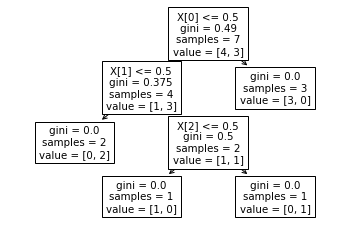

In [18]:
from sklearn import tree
tree.plot_tree(clf)

In [19]:
df.head(10)

,Temparature,Outlook,Routine,Wear Jacket?
0,Cold,Sunny,Indoor,No
1,Warm,Sunny,Outdoor,No
2,Warm,Cloudy,Indoor,No
3,Warm,Sunny,Indoor,No
4,Cold,Cloudy,Indoor,Yes
5,Cold,Cloudy,Outdoor,Yes
6,Cold,Sunny,Outdoor,Yes


[Text(200.88000000000002, 190.26, 'X[0] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(133.92000000000002, 135.9, 'X[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(200.88000000000002, 81.53999999999999, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

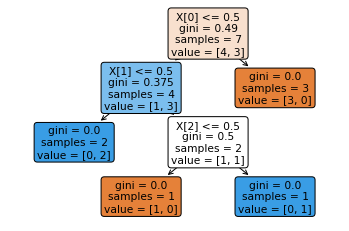

In [20]:
tree.plot_tree(clf,filled=True,rounded=True)

In [21]:
x.columns

Index(['Temparature', 'Outlook', 'Routine'], dtype='object')

[Text(200.88000000000002, 190.26, 'Temparature <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(133.92000000000002, 135.9, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(200.88000000000002, 81.53999999999999, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

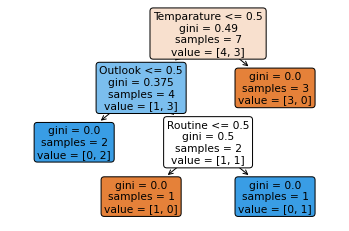

In [22]:
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns)

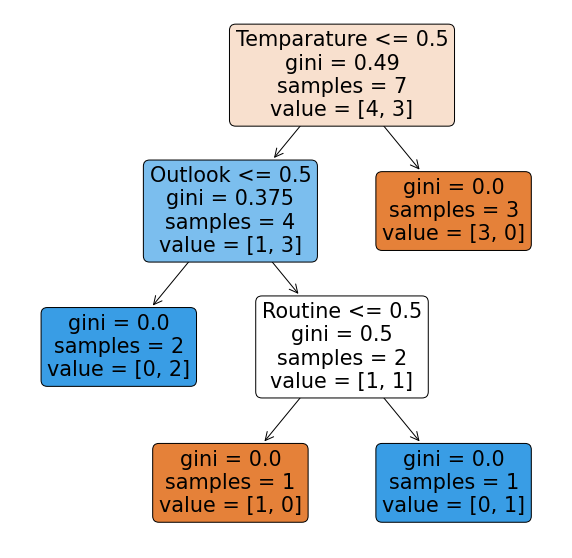

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns)
plt.savefig('tree.png')

In [24]:
# Naive Byes

df.isnull().sum()

Temparature     0
Outlook         0
Routine         0
Wear Jacket?    0
dtype: int64

In [39]:
x = df.drop(['Outlook'], axis = 1)

In [40]:
x

,Temparature,Routine,Wear Jacket?
0,Cold,Indoor,No
1,Warm,Outdoor,No
2,Warm,Indoor,No
3,Warm,Indoor,No
4,Cold,Indoor,Yes
5,Cold,Outdoor,Yes
6,Cold,Outdoor,Yes


In [41]:
y = df['Wear Jacket?']

In [42]:
y

0     No
1     No
2     No
3     No
4    Yes
5    Yes
6    Yes
Name: Wear Jacket?, dtype: object

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [50]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .25, random_state=1)

In [51]:
xtrain

,Temparature,Routine,Wear Jacket?
1,Warm,Outdoor,No
0,Cold,Indoor,No
4,Cold,Indoor,Yes
3,Warm,Indoor,No
5,Cold,Outdoor,Yes


In [52]:
model = LogisticRegression()

In [53]:
model.fit(xtrain,ytrain)

ValueError: could not convert string to float: 'Warm'

In [54]:
from sklearn.naive_bayes import BernoulliNB

In [55]:
bng = BernoulliNB()

In [ ]:
bng.fit(xtest,ytest)

In [ ]:
bng.score(xtest, ytest)